In [13]:

import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

### Exploring Data

In [3]:
#Load data:
data=pd.read_csv("C:/Users/prach/OneDrive/Desktop/internship/Feynn Labs/Project_2_Market segmentaion/mcdonalds.csv")
data

#Viewing column names:
print(data.columns.tolist())

#Dimension of dataset:
print(data.shape)

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(1453, 15)


In [11]:
#First 3 rows of the dataset:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [7]:
#Selecting the first 11 columns (binary variables)
df = data.iloc[:, 0:11].copy()

#Converting 'Yes' to 1 and others to 0
df = (df == "Yes").astype(int)

#Getting column-wise mean (people saying 'Yes')
col_means = df.mean().round(2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


#### Principle Component analysis(PCA)

PCA is like compressing your data — keeping the important patterns, but reducing the number of variables.

df_pca is the transformed data.

df_p stores model information like how much variance each component explains.

In [8]:
#This creates a summary table showing SD, Proportion of variance, Cumulative proportion:

pca = PCA()
df_pca=pca.fit_transform(df)
df_p=pca.fit(df)

SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_
index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [9]:

print("Standard Deviation:\n",SD.round(1))

load = (pca.components_)
i=0
rot_mtx = df_p.components_.T

rot_df = pd.DataFrame(rot_mtx, index=df.columns.values, columns=index)
rot_df=round(rot_df,3)
rot_df

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,0.055,0.308,-0.171,-0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,-0.142,-0.278,0.348,-0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,0.198,-0.071,0.355,0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,-0.354,0.073,0.407,-0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,0.254,-0.361,-0.209,0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,-0.097,-0.108,0.595,-0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,0.119,0.129,0.103,-0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,-0.003,0.211,0.077,0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,0.068,0.003,0.261,-0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,0.763,-0.288,0.178,-0.350,-0.176,0.186,0.038,-0.158


##### PCA 2D plot:

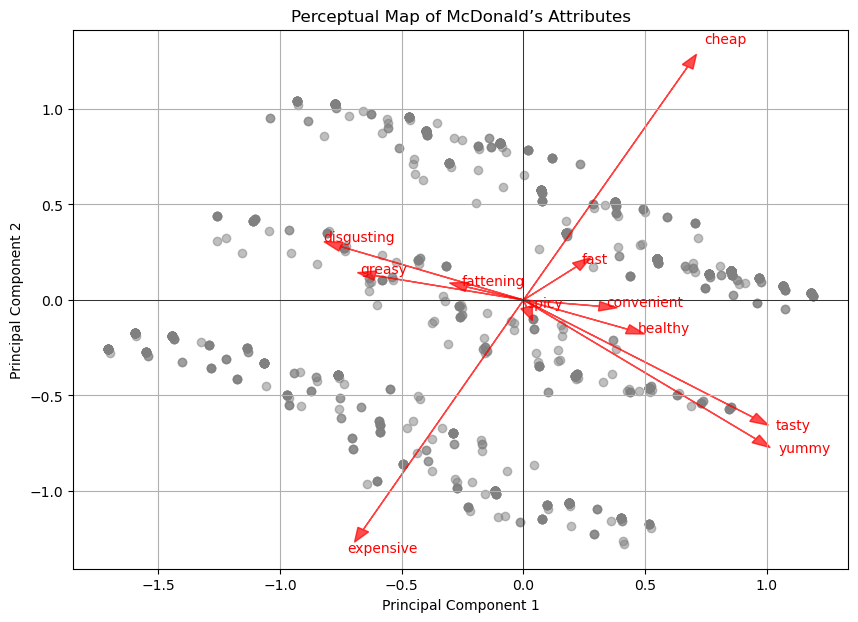

In [10]:

# Plot the first two components (the perceptual map)
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], color='grey', alpha=0.5)
plt.title('Perceptual Map of McDonald’s Attributes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot arrows for each original variable (loadings)
loadings = pca.components_.T  # shape: [variables x components]

for i, var in enumerate(df.columns):
    plt.arrow(0, 0,                 # start at origin
              loadings[i, 0]*2,     # scale for better visualization
              loadings[i, 1]*2,
              color='red', alpha=0.7, head_width=0.05)
    plt.text(loadings[i, 0]*2.2, loadings[i, 1]*2.2, var, color='red', fontsize=10)

plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

### Extracting Segments:

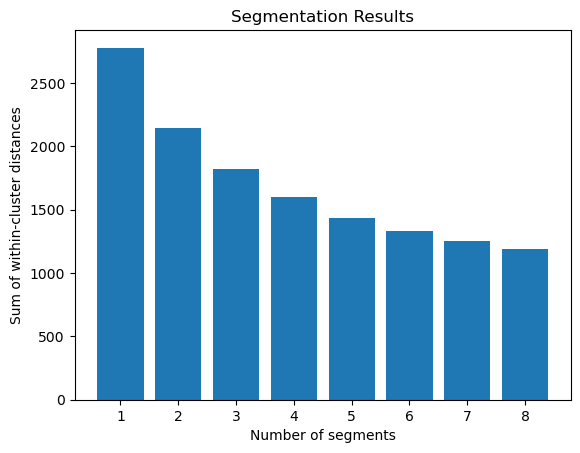

In [11]:
#Using K-means Clustering:

np.random.seed(1234)

nrep = 10

segment_no = range(1, 9)                                #Taking total of 8 clusters
within_cluster_distances = []
df_km28 = {}

for k in segment_no:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(df)
    within_cluster_distances.append((kmeans.inertia_))
    df_km28[str(k)] = kmeans

plt.bar(segment_no, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

#As no of clusters increase, sum of within cluster distance falls

##### Using global stability boxplot:

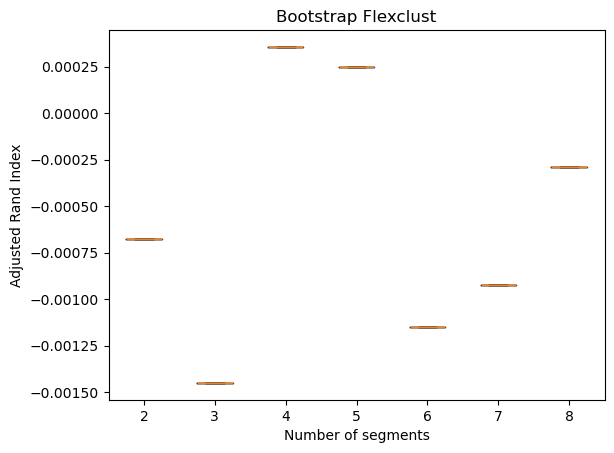

In [26]:
np.random.seed(1234) 
nboot = 100  
nrep = 10  

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(df.values, random_state=1234) 
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
segments = range(2, 9)
for k in segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)  
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(df.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, tick_labels=segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

the figure shows distribution of stability for each number of
 segments. The median is indicated by the fat black horizontal line in the middle
 of the box. Higher stability is better.
 thus 4 clusters are the most stable so 4 is the optimum no of clusters:

##### George Plot:

We gain further insights into the structure of the four-segment solution with a
 gorge plot:

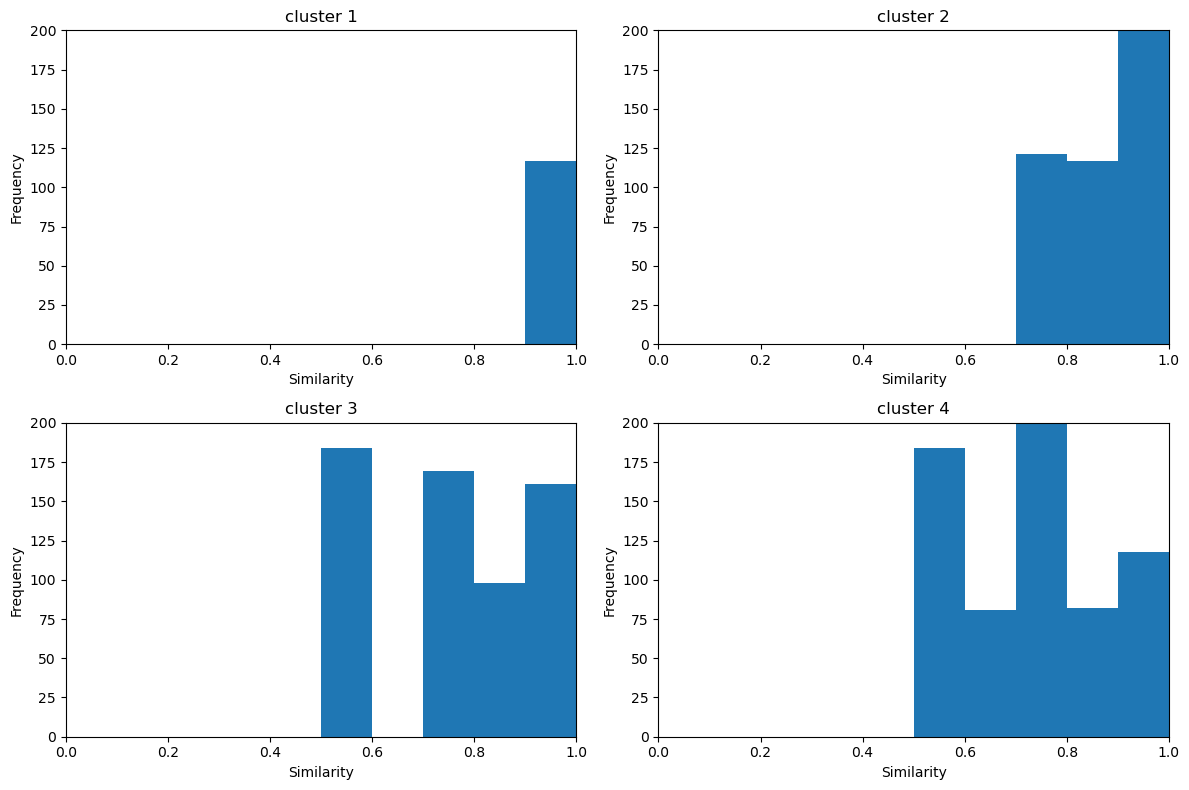

In [28]:

range_values = (0, 1)
num_bins = 10
max_frequency = 200

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i in range(1, 5):
    labels = df_km28[str(i)].predict(df)
    similarities = df_km28[str(i)].transform(df).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)

    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

Each subplot (like "cluster 1", "cluster 2"...) is a histogram showing how similar members of that cluster are across multiple runs of clustering.
Clusters 1 & 2: Very strong and clearly distinct groups. These customers behave very similarly.
Clusters 3 & 4: More mixed, possibly overlapping customer behaviors — need further investigation or more features.

##### Segment Level Stability Across Solutions (SLSA) Plot

To inspect how segment
 memberships change each time an additional market segment is added, and to assess
 segment level stability across solutions. This information is contained in the segment
 level stability across solutions (SLSA) plot

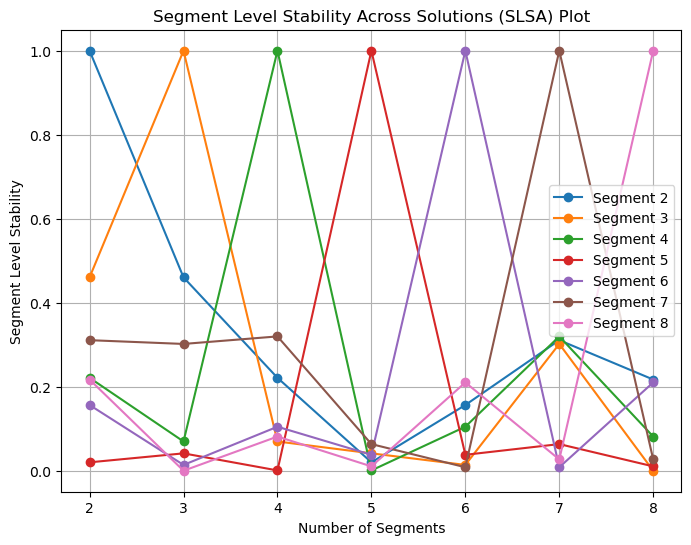

In [31]:
segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = df_km28[str(segment)].predict(df)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(segments)
plt.legend()
plt.grid(True)

plt.show()

 ##### Segment level stability within solutions(SLSW)plot

 global stability assesses the stability of a segmentation solution in
 its entirety. It does not investigate the stability of each market segment. We obtain
 the stability of each segment by calculating segment level stability within solutions
 (SLSW)

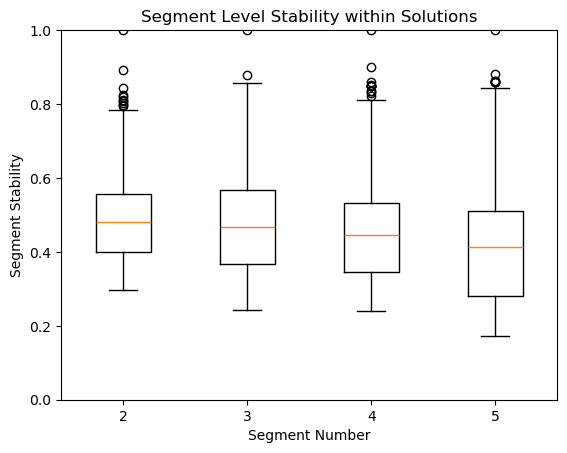

In [32]:

segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = df_km28[segment].predict(df)
    segment_similarities[segment] = df_km28[segment].transform(df).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

This plot is a box plot showing the overall segment stability for different numbers of clusters (2 to 5). It's a summary of how consistent or reliable the segments are within each clustering solution. 4 segments is still reasonable, especially for finer detail

### Profiling Segments:

Now we need to understand what the four-segment k-means solution
 means. The first step in this direction is to create a segment profile plot. The segment
 profile plot makes it easy to see key characteristics of each market segment. It also
 highlights differences between segments. To ensure the plot is easy to interpret,
 similar attributes should be positioned close to one another. We achieve this by
 calculating a hierarchical cluster analysis.

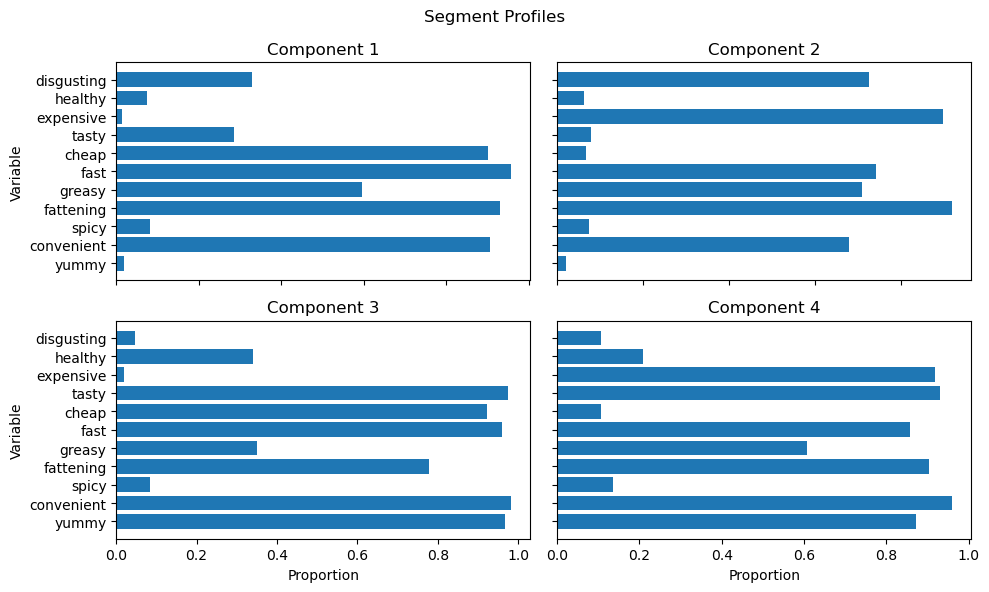

In [34]:
kmeans = df_km28['4']

labels = kmeans.labels_

df_mean = df.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(df_mean.shape[1]), df_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(df_mean.shape[1]), df_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(df_mean.shape[1]), df_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(df_mean.shape[1]), df_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(df_mean.shape[1]))
    ax.set_yticklabels(df.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()


Segments 1 and 3 both view McDonald’s as cheap, with members of segment 3 holding, some positive beliefs and members ofsegment 1 associating McDonald’s primarily with negative attributes. At the other end of the price spectrum, segments 2 and 4 agree that McDonald’s is not cheap, but disagree on other features with segment 2 holding a less flattering view than members of segment 3

##### Segment separation plot:

Projects the dataset onto the first two principal components (via PCA).
Colors the points based on which cluster/segment they belong to.
Shows how well-separated the segments are visually in 2D.
Helps managers understand how distinct or overlapping the customer segments are

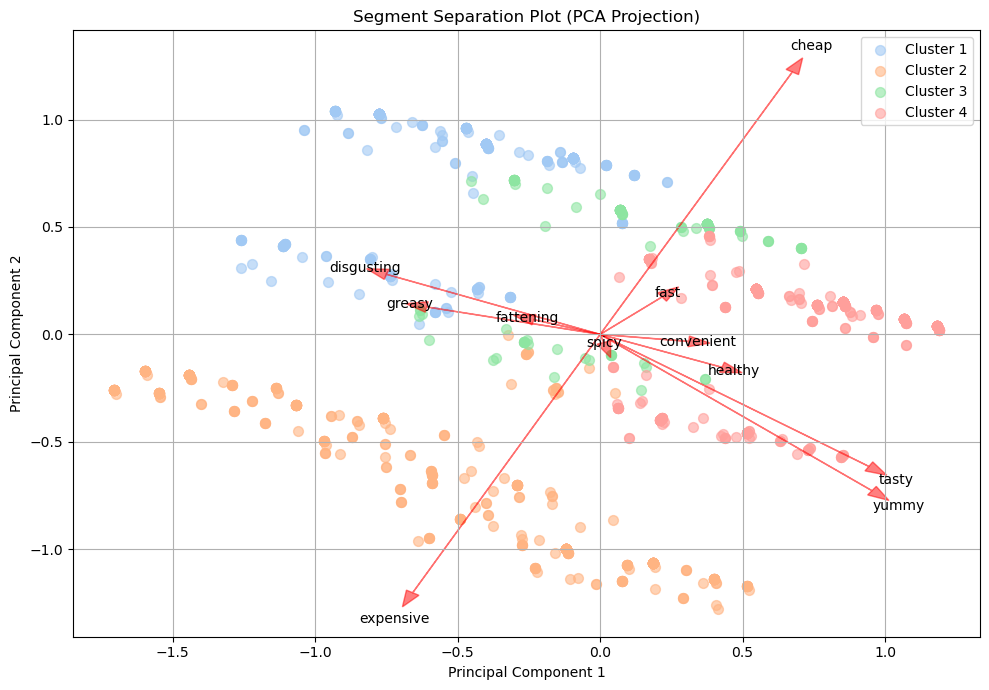

In [25]:
labels = kmeans.fit_predict(df.iloc[:, :11])

# Plot
plt.figure(figsize=(10, 7))
palette = sns.color_palette("pastel", 4)

for cluster in range(4):
    plt.scatter(
        df_pca[labels == cluster, 0],
        df_pca[labels == cluster, 1],
        label=f"Cluster {cluster+1}",
        alpha=0.6,
        s=50,
        color=palette[cluster]
    )

# Plot projection arrows (like projAxes in R)
loadings = pca.components_.T
for i, feature in enumerate(df.columns[:11]):
    plt.arrow(0, 0, loadings[i, 0]*2, loadings[i, 1]*2,
              color='red', alpha=0.5, head_width=0.05)
    plt.text(loadings[i, 0]*2.2, loadings[i, 1]*2.2, feature,
             color='black', ha='center', va='center')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Segment Separation Plot (PCA Projection)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

###  Describing Segments:

Descriptor variables– additional pieces of information about consumers– are critically important to
 gaining a good understanding of market segments. One descriptor variable available
 in the fast food data set is the extent to which consumers love or hate McDonald’s

##### Mosaic plot:


 Using a simple mosaic plot, we can visualise the association between segment
 membership and loving or hating McDonald’s.

C:\Users\prach\AppData\Local\Temp\ipykernel_9096\2804406659.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_binary = data[cols].applymap(lambda x: 1 if x == 'Yes' else 0)


<Figure size 1000x600 with 0 Axes>

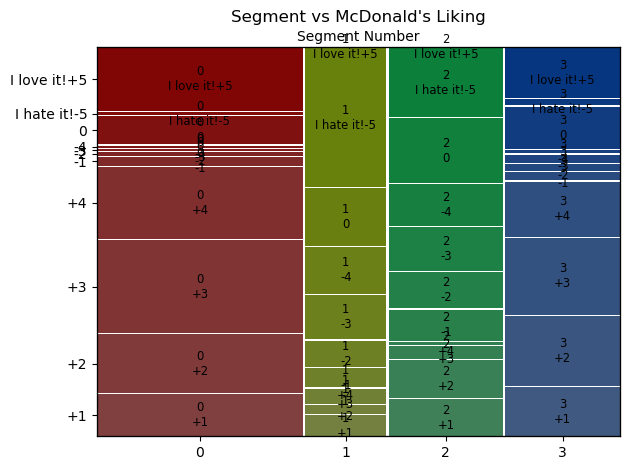

In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

data1=pd.read_csv("C:/Users/prach/OneDrive/Desktop/internship/Feynn Labs/Project_2_Market segmentaion/mcdonalds.csv")
# Convert Yes/No to 1/0
cols = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 
        'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
data_binary = data[cols].applymap(lambda x: 1 if x == 'Yes' else 0)

# Run KMeans clustering with 4 segments
kmeans = KMeans(n_clusters=4, random_state=1234)
data['cluster'] = kmeans.fit_predict(data_binary)

# Prepare the mosaic plot data: segment vs Like score
mosaic_data = pd.crosstab(data['cluster'], data['Like'])

# Create the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(mosaic_data.stack())
plt.title("Segment vs McDonald's Liking")
plt.xlabel("Segment Number")
plt.ylabel("Like Response")
plt.tight_layout()
plt.show()

In [ ]:
# For gender:

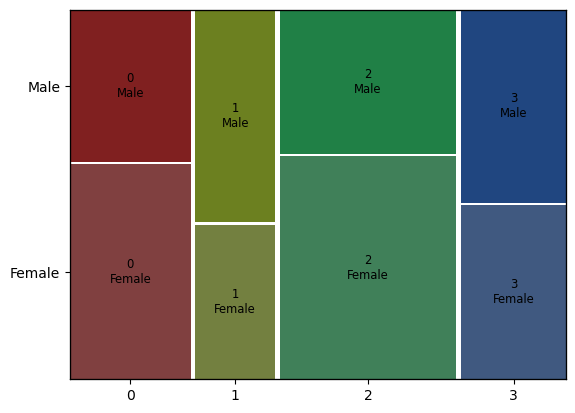

In [21]:
from statsmodels.graphics.mosaicplot import mosaic

df_k4=df_km28['4']
k4 = df_k4.labels_

ct = pd.crosstab(k4, data['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

Cluster 2 is the largest segment for both males and females, indicating it's the most popular or representative cluster overall.
Cluster1 is smallest for both genders.
The segment distribution is not uniform across genders, suggesting that gender may influence cluster membership.

#####  Parallel box-and-whisker plot:

Because age is metric– rather than categorical– we use a parallel box-and
whisker plot to assess the association of age with segment membership.

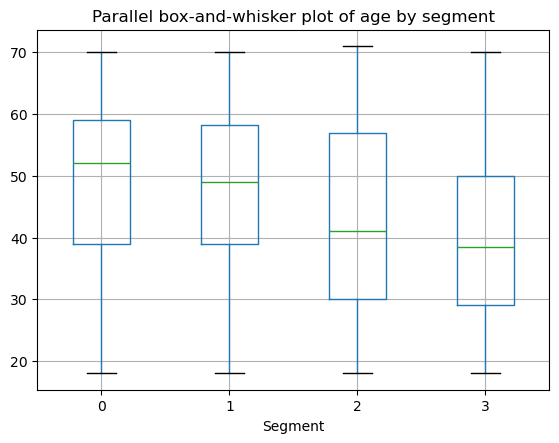

In [22]:

df1 = pd.DataFrame({'Segment': k4, 'Age': data['Age']})

df1.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

We see that the notches do not overlap, suggesting significant differences in
 average age across segments. 

Also members of segment 4– consumers who think McDonald’s is yummy and tasty, but expensive– are younger than the members of all other segments

### Selecting the Target Segment(s):

Using the knock-out criteria and segment attractiveness criteria specified in Step 2,
 users of the market segmentation (McDonald’s managers) can now proceed to
 develop a segment evaluation plot.

##### Segment evaluation plot:

First, we compute the mean value of the visiting frequency of McDonald’s for each segment.


In [26]:
data1['VisitFrequency'] = LabelEncoder().fit_transform(data1['VisitFrequency'])
visit = data1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


Computing mean segment va,ues for liking McDonald's :

In [27]:
data1['Like'] = LabelEncoder().fit_transform(data1['Like'])
Like = data1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.888514
1,1,4.957717
2,2,3.694656
3,3,3.915009


Computing mean segment values for gender:

In [28]:
data1['Gender'] = LabelEncoder().fit_transform(data1['Gender'])
Gender = data1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


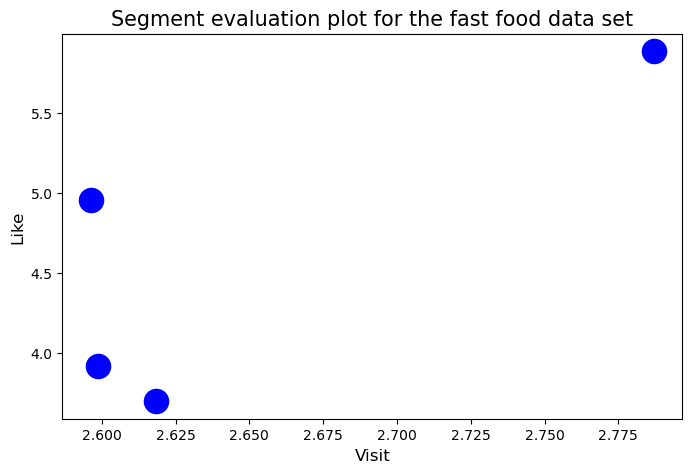

In [29]:

segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (8,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="blue")
plt.title("Segment evaluation plot for the fast food data set",fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()

##### Conclusion: 
The top-right segment has the highest "Like" and highest "Visit" score.
This is your most loyal and satisfied segment — they both enjoy and visit often.
Ideal target for retention strategies or loyalty programs.

The bottom-left three segments have lower "Like" and slightly lower "Visit" scores:

One segment has decent liking (~5.0) but low visits → maybe accessibility is an issue.

Others have both lower liking (~3.7–3.9) and low visit frequency.
These groups might require service improvement, marketing nudges, or you may even de-prioritize them.